# **Importing Library**




In [364]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [365]:
import warnings
warnings.filterwarnings('ignore')

In [366]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  ...          type    year  region
0         0.0  27-12-2015          1.33  ...  conventional  2015.0  Albany
1         1.0  20-12-2015          1.35  ...  conventional  2015.0  Albany
2         2.0  13-12-2015          0.93  ...  conventional  2015.0  Albany
3         3.0  06-12-2015          1.08  ...  conventional  2015.0  Albany
4         4.0  29-11-2015          1.28  ...  conventional  2015.0  Albany

[5 rows x 14 columns]

# ***EDA***

In [ ]:
df.shape

(16468, 14)

In [ ]:
df.describe()

Unnamed: 0  AveragePrice  ...    XLarge Bags         year
count  1517.000000   1517.000000  ...    1517.000000  1517.000000
mean     26.995386      1.074990  ...    2181.771074  2015.162821
std      14.848287      0.188891  ...    7455.712144     0.369324
min       0.000000      0.490000  ...       0.000000  2015.000000
25%      14.000000      0.980000  ...       0.000000  2015.000000
50%      29.000000      1.080000  ...       0.000000  2015.000000
75%      39.000000      1.190000  ...     401.480000  2015.000000
max      51.000000      1.680000  ...  108072.790000  2016.000000

[8 rows x 11 columns]

In [ ]:
df.describe(include=['O'])

Date          type      region
count         1517          1517        1517
unique         104             1          51
top     05-04-2015  conventional  California
freq            34          1517          76

## **checking null value**

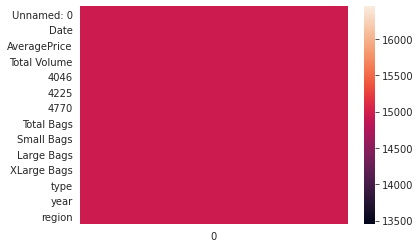

In [ ]:
sns.heatmap(df.isnull().sum().to_frame())

In [ ]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.dropna(axis=0,inplace=True)

## **Data Formatting**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


## **Visualization and preprocessing**

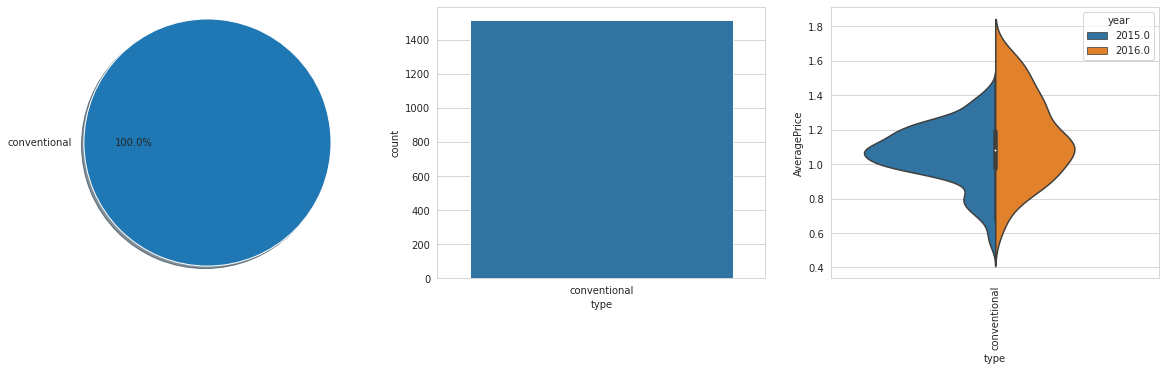

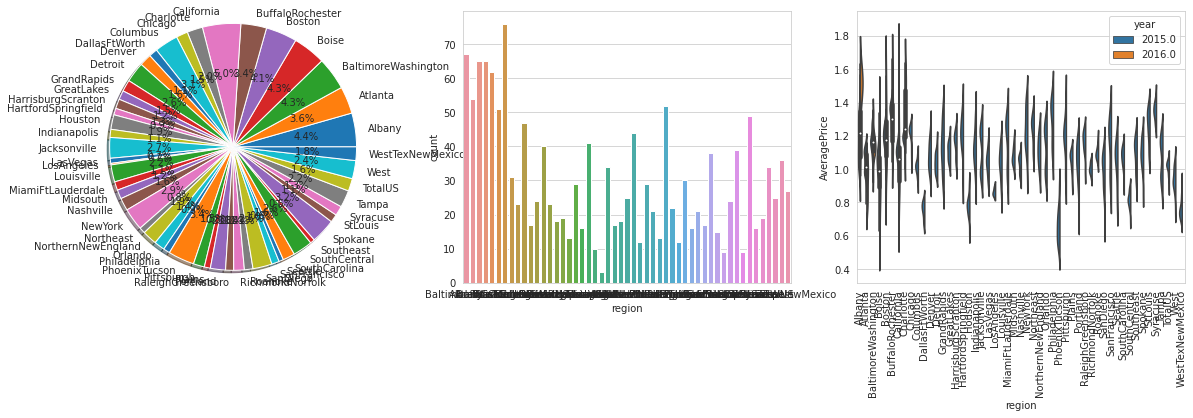

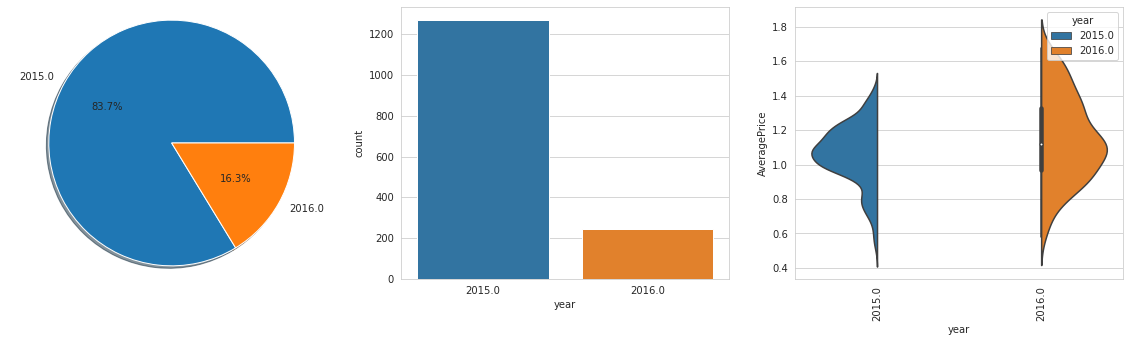

In [ ]:

for i in ['type','region','year']:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2)
  sns.violinplot(y='AveragePrice',x=i,data=df,hue='year',split=True,ax=ax3)
  plt.xticks(rotation=90) 
  plt.show()

1. As 'type' has only one category we can drop this variable. 
2. Region has very high variability with avg price so it can be encoded with mean of Avg price
3. though only 16.3% of data belongs to 2016 its avg price range is more distributed 



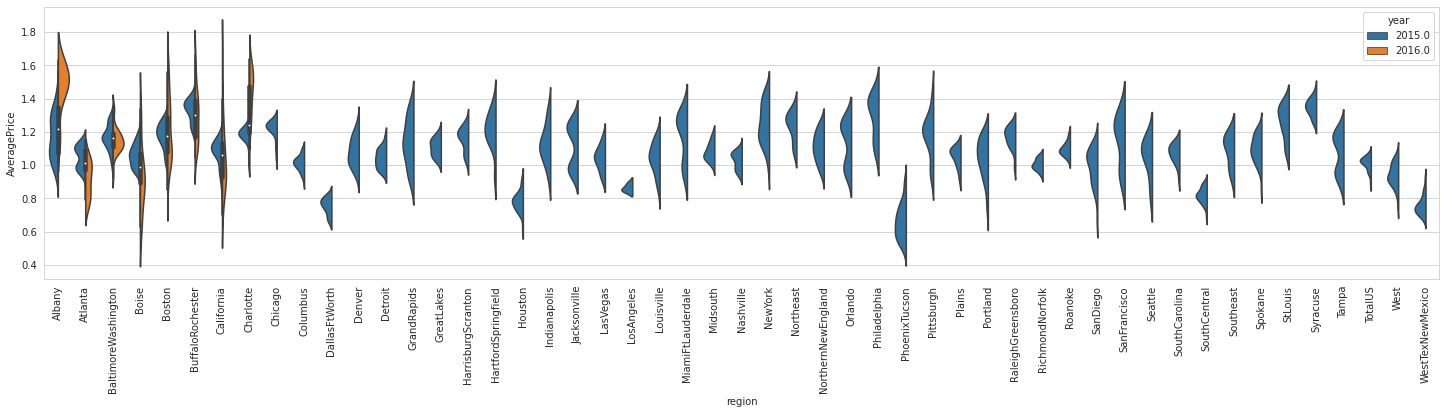

<Figure size 1080x360 with 0 Axes>

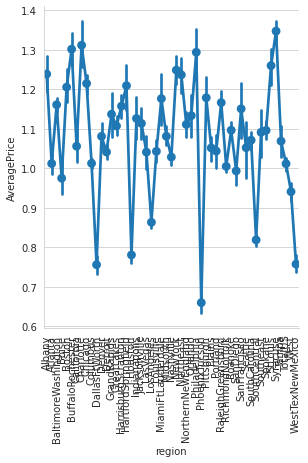

In [ ]:

plt.figure(figsize=(25,5))
sns.violinplot(y='AveragePrice',x='region',hue='year',split=True,data=df)
plt.xticks(rotation=90)
plt.figure(figsize=(15,5))
sns.factorplot(y='AveragePrice',x='region',data=df)
plt.xticks(rotation=90)
plt.show()


In very few states avacado were sold in 2016



In [ ]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  sns.scatterplot(x=i,y='AveragePrice',data=df,hue='year')
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

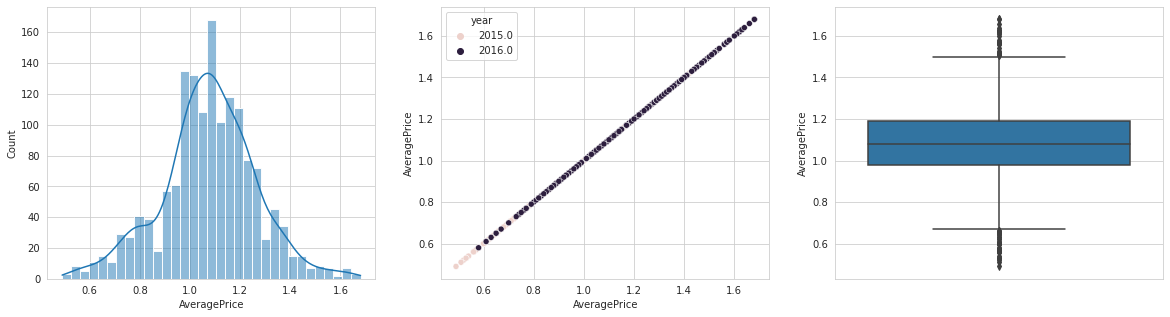

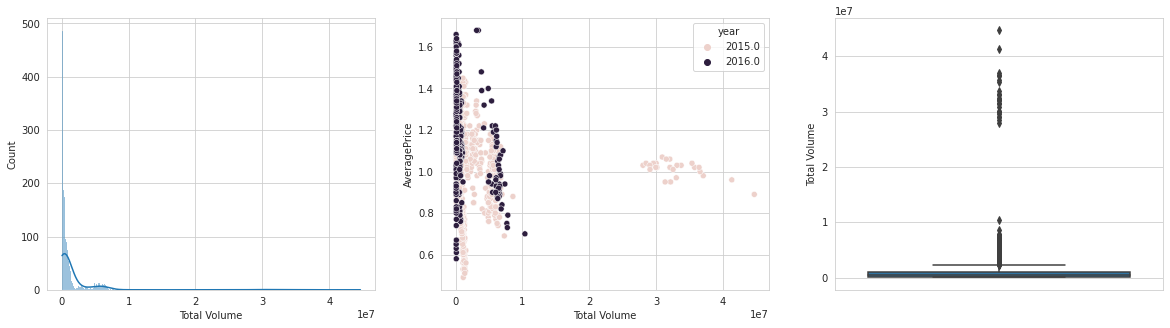

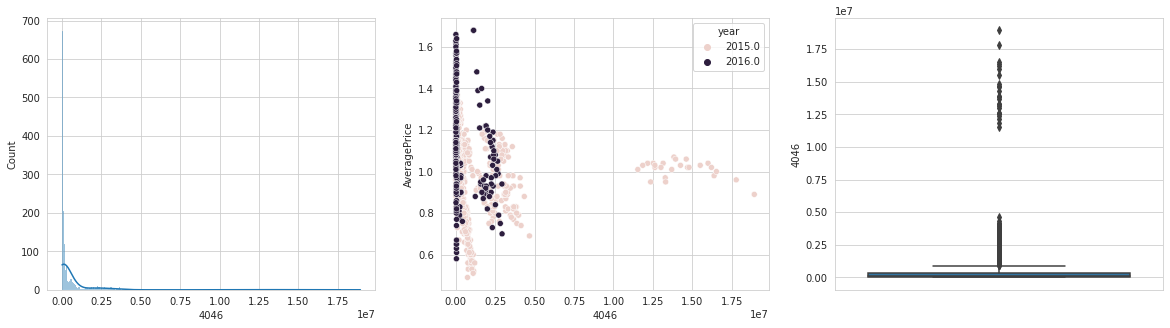

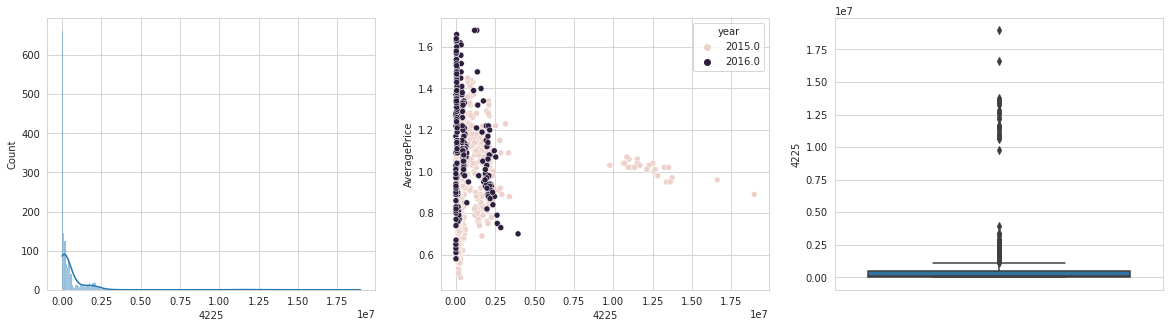

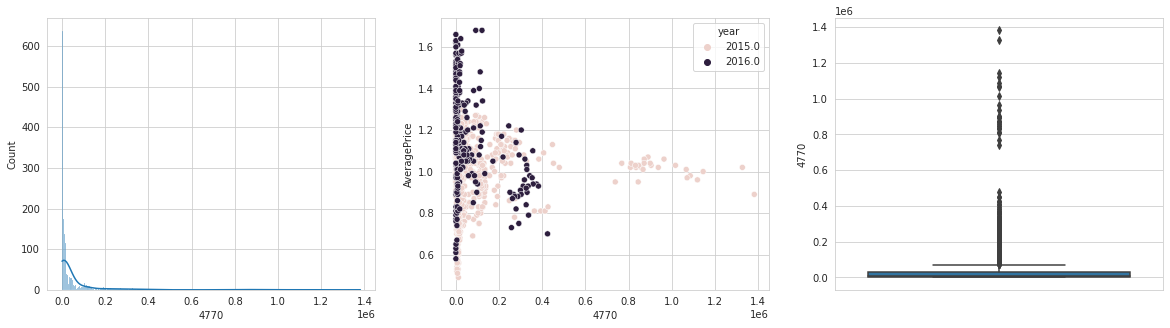

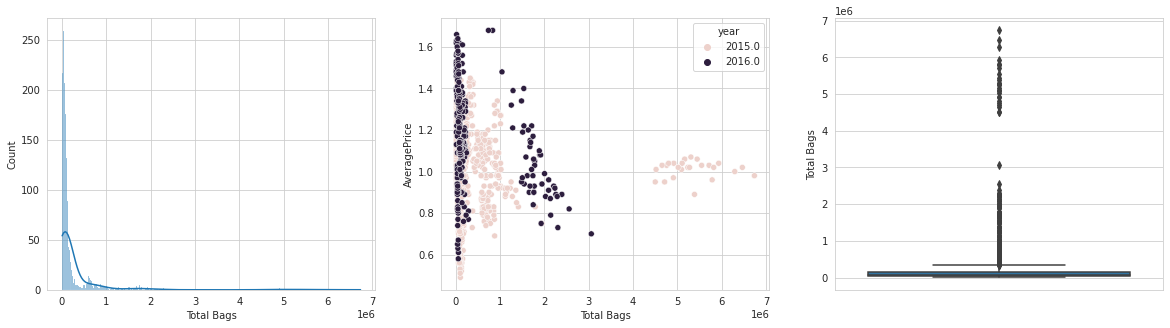

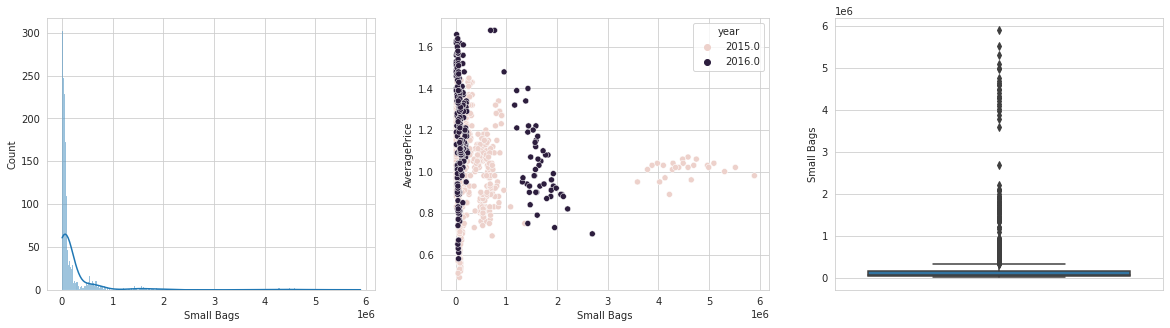

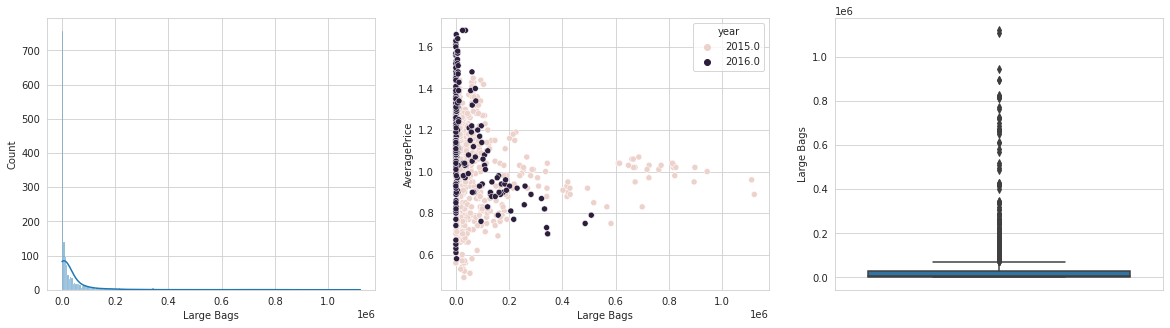

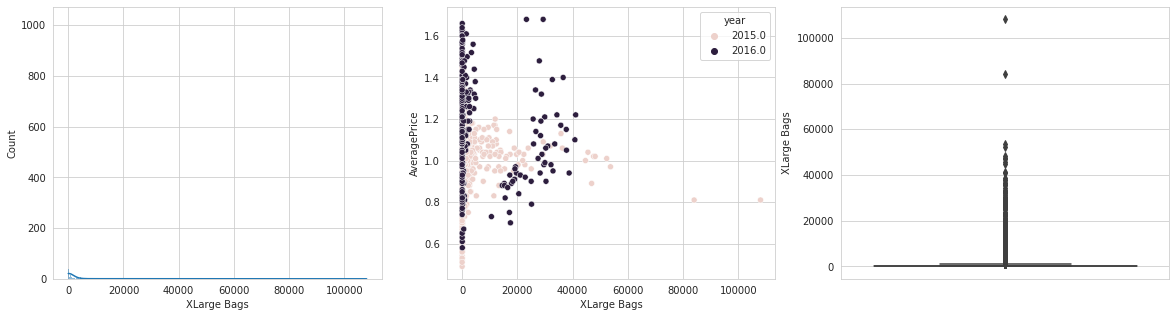

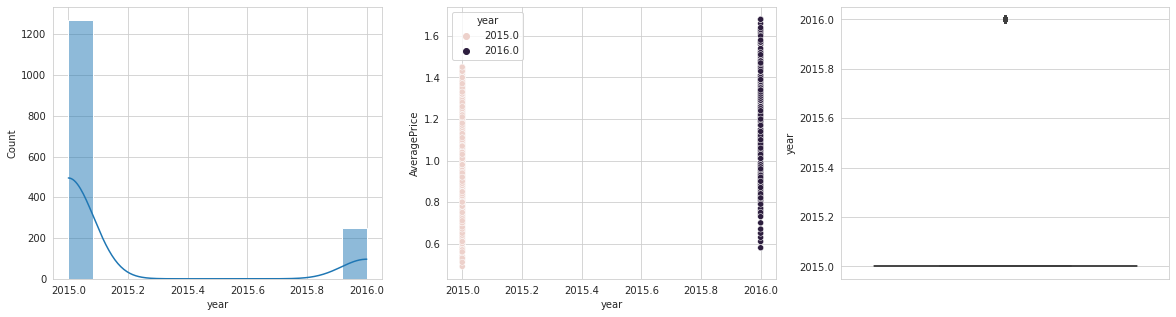

In [ ]:
import scipy.stats as stat
import pylab 
df_num=df.drop(['type','region','Date'],axis=1)
for i in df_num.columns:
  pplot(df,i)

1. No large sales in 2016
2. large sales have almost same value od avg sales
3. Except for avg price none of the features are unskewed


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103],
 <a list of 104 Text major ticklabel objects>)

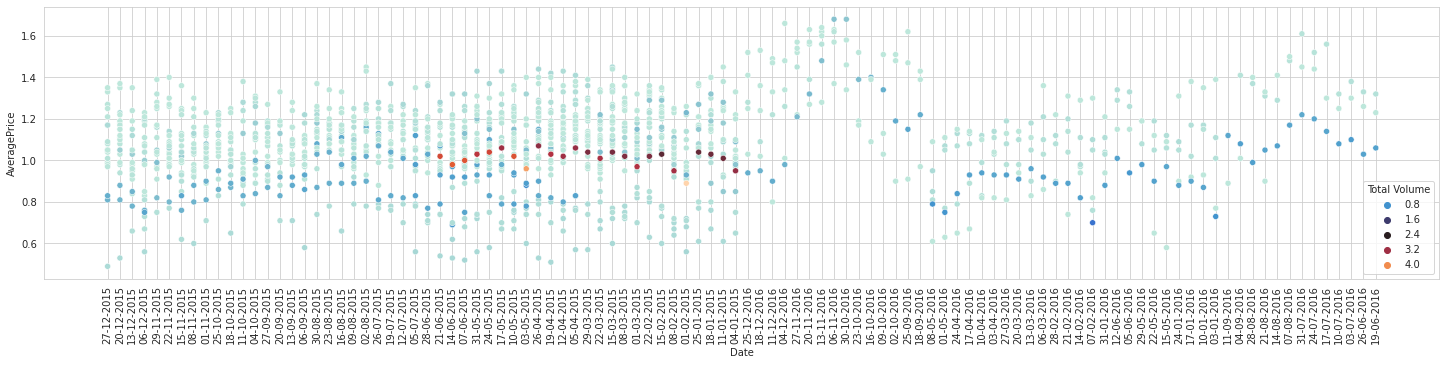

In [ ]:
plt.figure(figsize=(25,5))
sns.scatterplot(x='Date',y='AveragePrice',hue='Total Volume',data=df,palette='icefire')
plt.xticks(rotation=90)

No large quantities sale in 2016

In [ ]:
import datetime

In [ ]:
df['month']=pd.to_datetime(df.Date).dt.month

In [ ]:
df['week']=pd.to_datetime(df.Date).dt.week

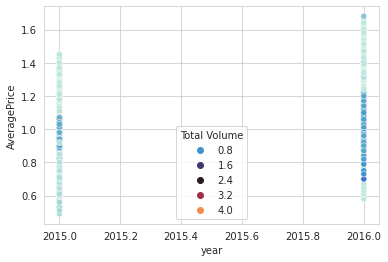

In [ ]:
sns.scatterplot(x='year',y='AveragePrice',hue='Total Volume',data=df,palette='icefire')

Higher the volume lesser is variation in price

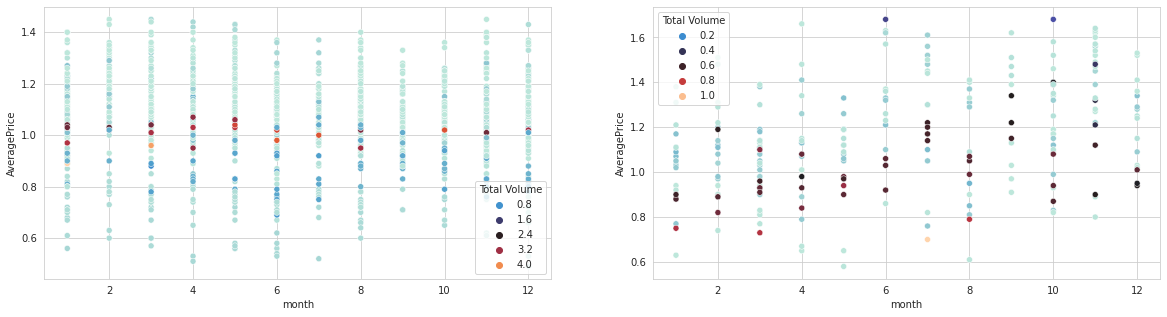

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(x='month',y='AveragePrice',hue='Total Volume',data=df.loc[df.year==2015],palette='icefire')
plt.subplot(1,2,2)
sns.scatterplot(x='month',y='AveragePrice',hue='Total Volume',data=df.loc[df.year==2016],palette='icefire')

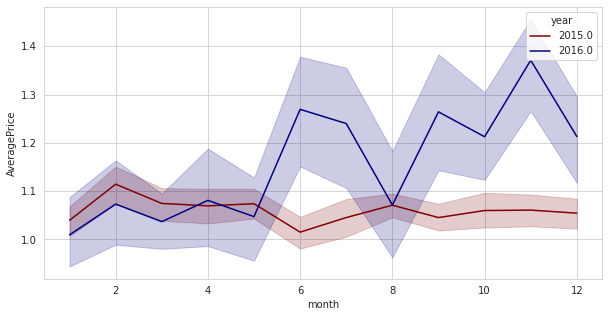

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='month',y='AveragePrice',hue='year',data=df,palette='jet_r')

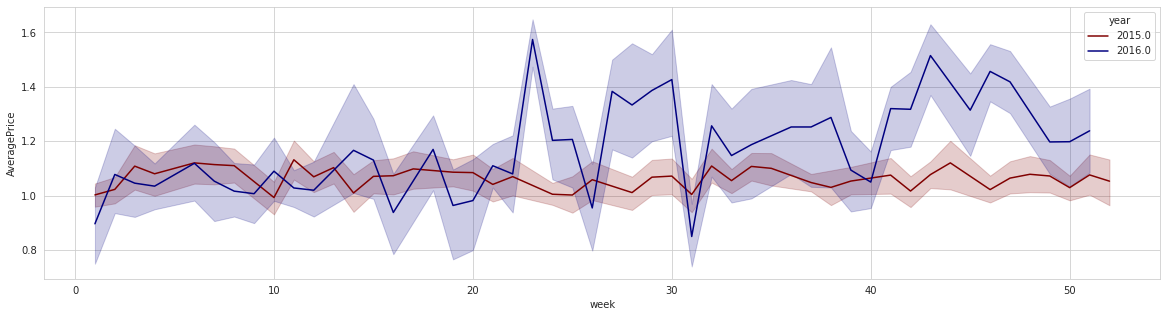

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x='week',y='AveragePrice',hue='year',data=df,palette='jet_r')

 
No common pattern can be seen in sales by month. Although it can be seen in march of 2016 some abnormalities have occurred  so it stops following the curve of 2015. for any assesment for monts and year more data point is required 


In [ ]:
from sklearn.preprocessing import power_transform as PT

def p_trns(df,features):
  pt=pd.DataFrame()
  for i in features:
    if df[i].min()<=0:
      pt1=(df[i]-df[i].min()+0.0001)
    else:
      pt1=df[i]
    pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)
  pt1=PT(pt)
  pt1=pd.DataFrame(pt1,columns=features)
  return(pt1)



In [ ]:
temp=df.drop(['type','region','Date','year','month','week'],axis=1)

In [ ]:
pt1=p_trns(df,temp.columns)

In [ ]:
df_stan=pd.concat([df[['region','Date','year','month','week']],pt1],axis=1)


In [ ]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

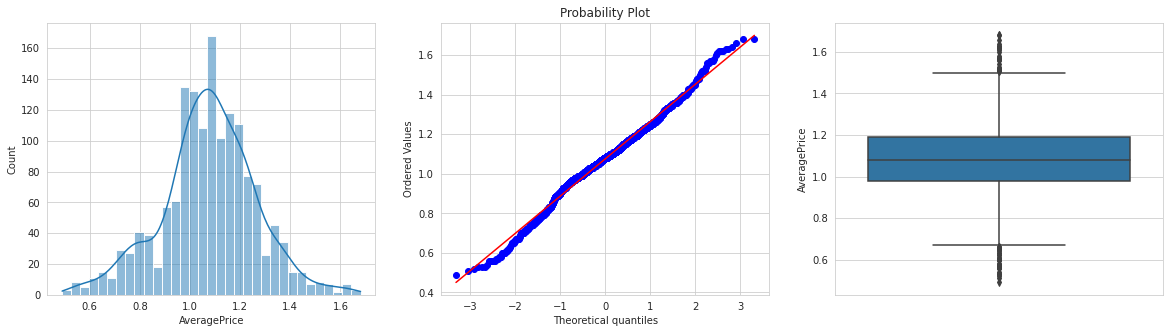

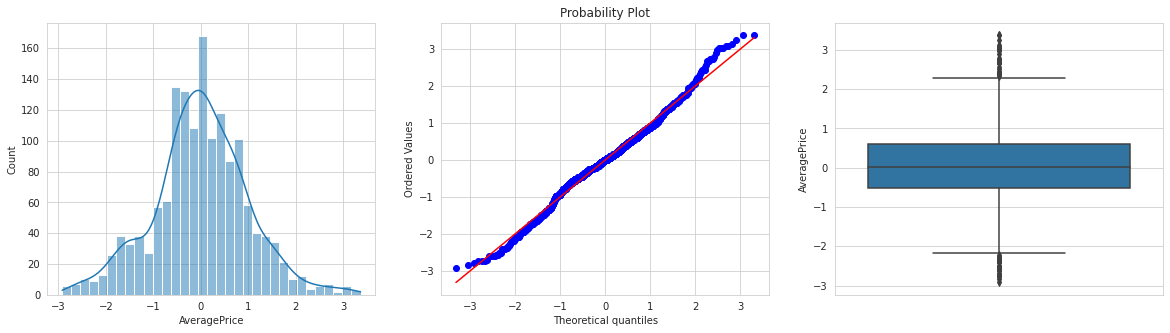

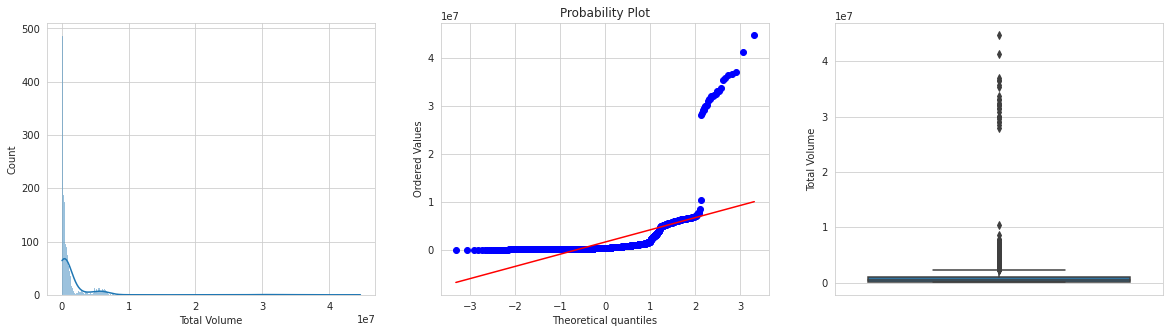

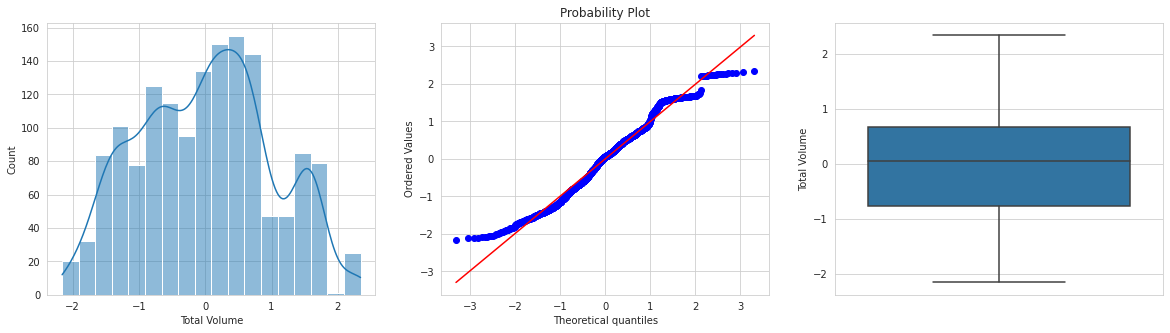

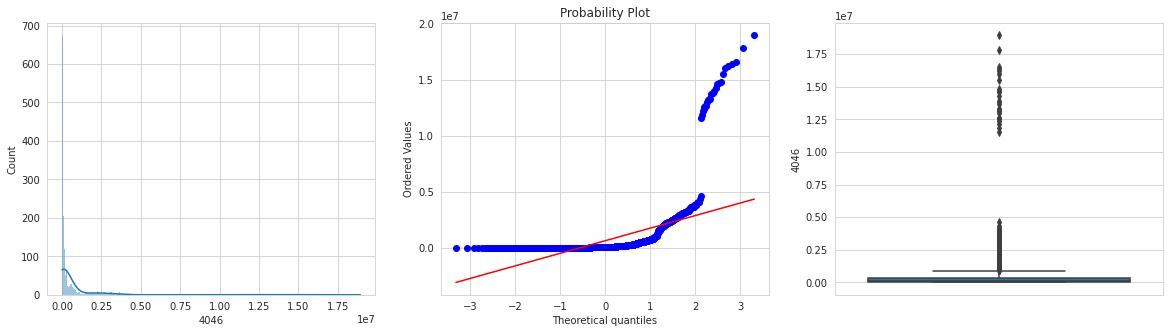

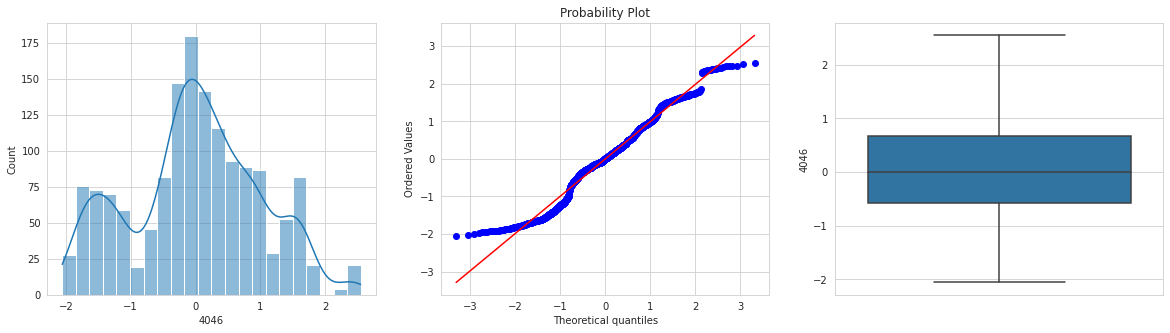

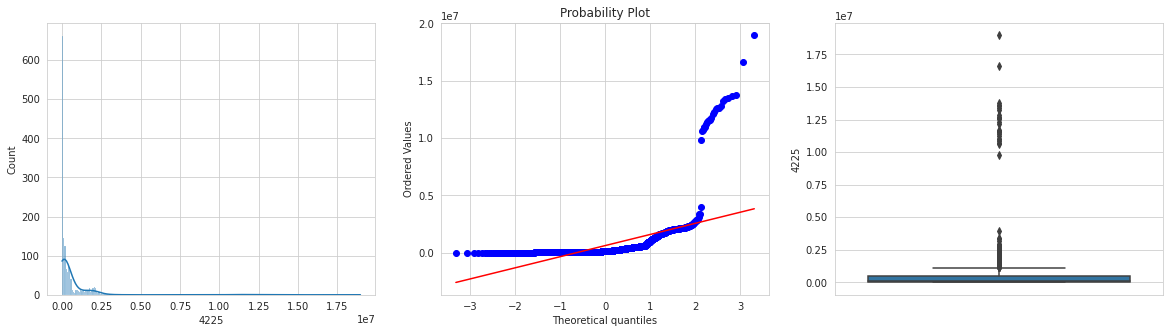

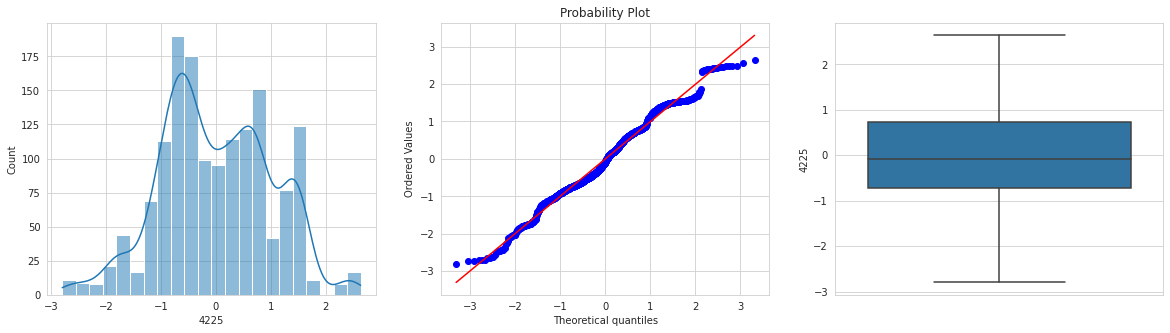

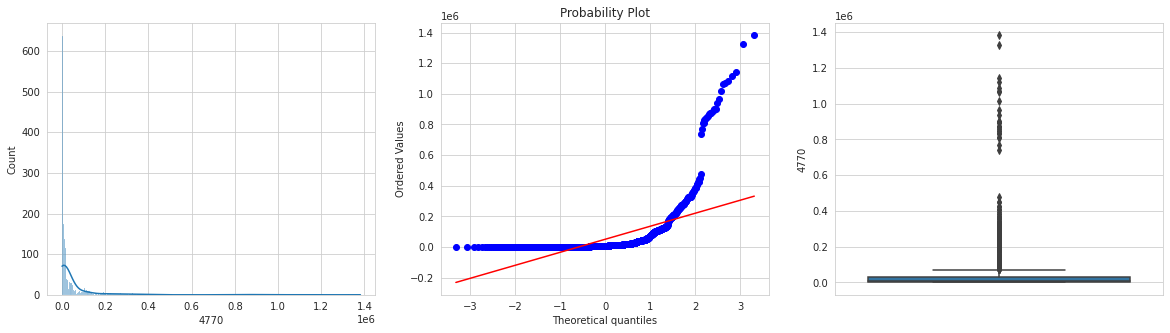

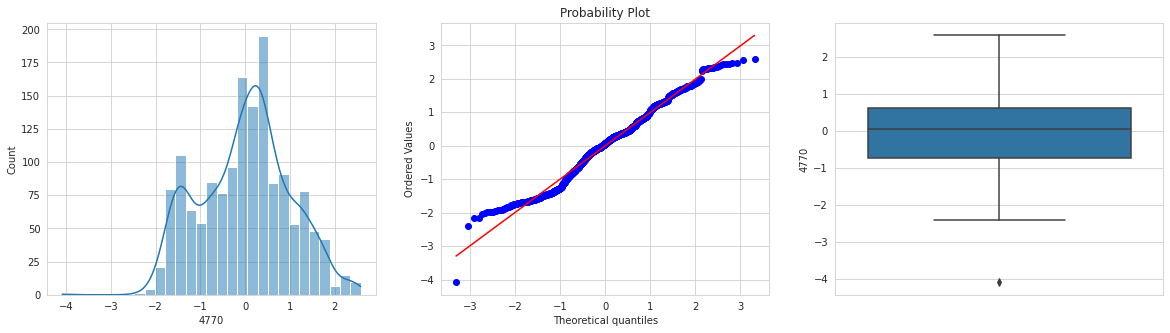

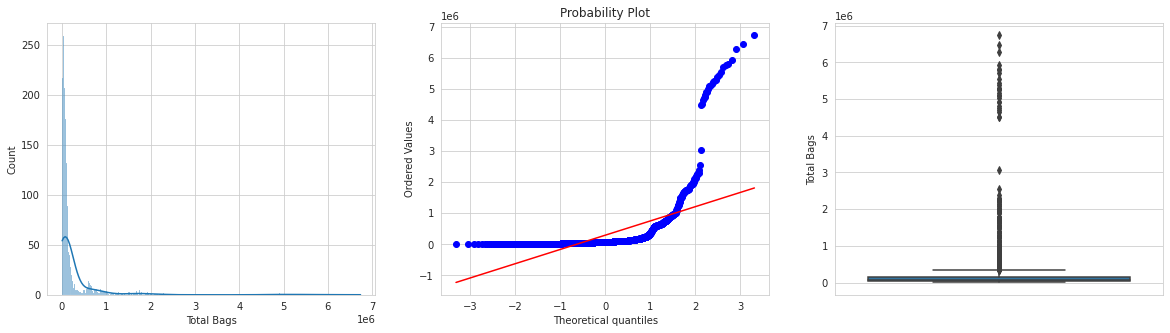

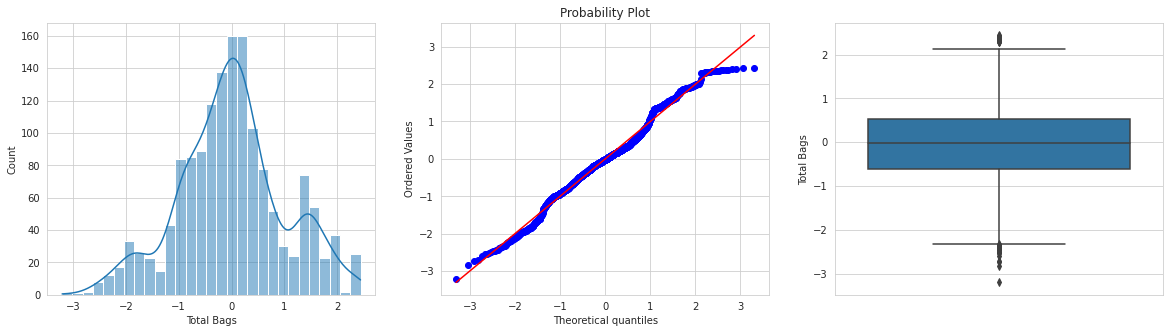

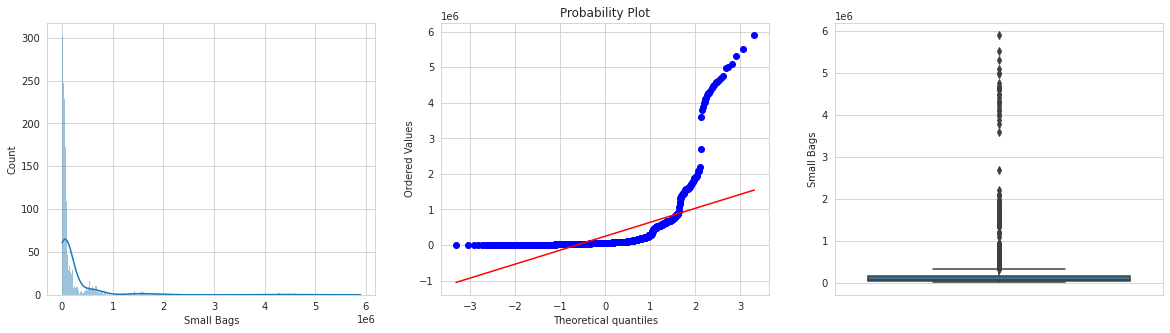

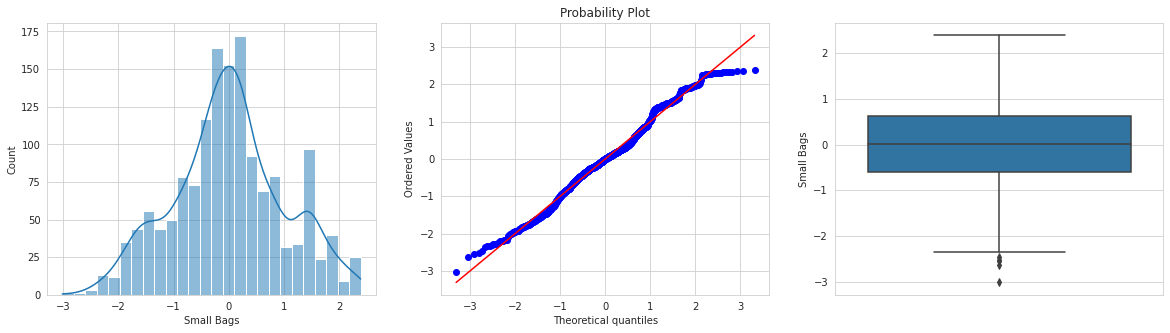

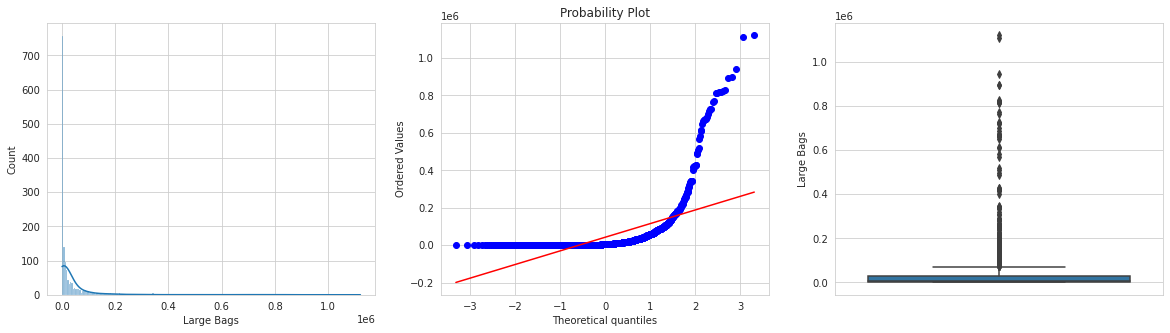

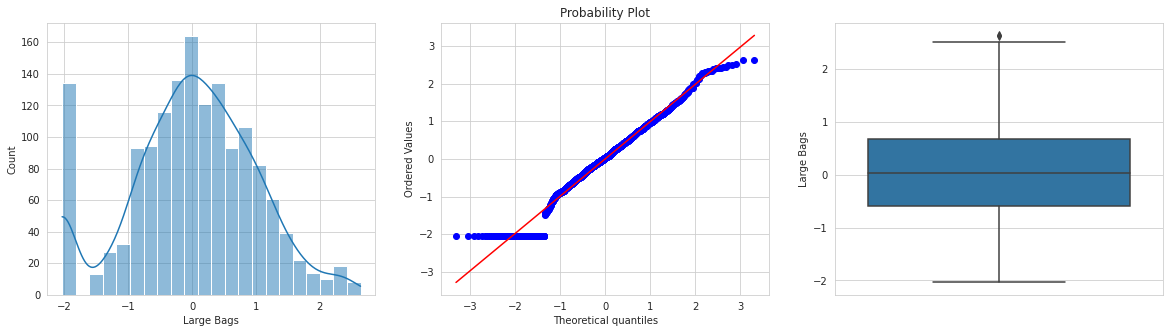

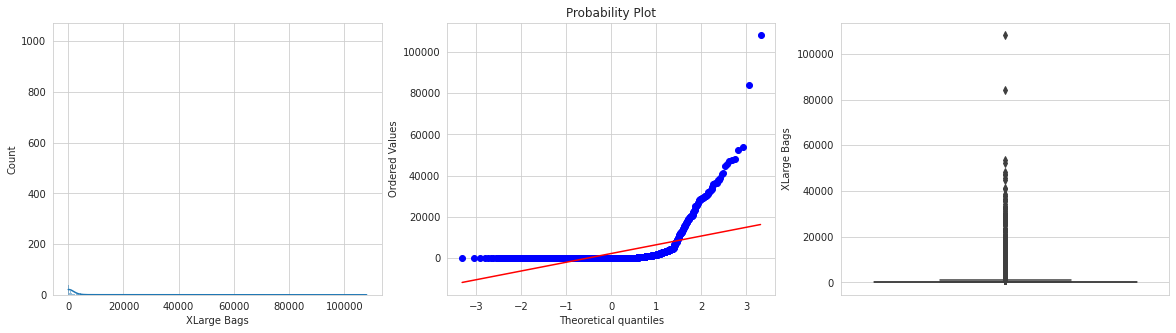

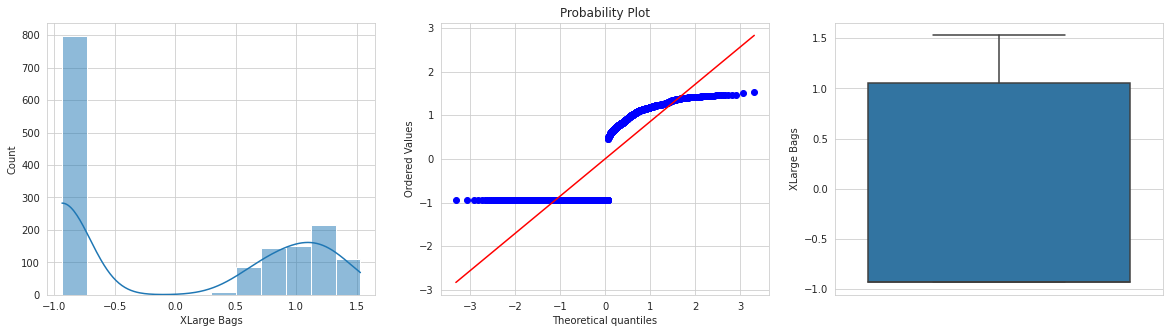

In [ ]:
import scipy.stats as stat
import pylab 
for i in temp.columns:
  pplot(df,i)
  pplot(pt1,i)

By using Power transform almost all the variables are distibuted normaly but 

## **Encoding**:- 

In [ ]:
df_stan.head()

region        Date    year  ...  Small Bags  Large Bags  XLarge Bags
0  Albany  27-12-2015  2015.0  ...   -1.847596   -0.944202    -0.933949
1  Albany  20-12-2015  2015.0  ...   -1.748430   -0.936110    -0.933949
2  Albany  13-12-2015  2015.0  ...   -1.923556   -0.925784    -0.933949
3  Albany  06-12-2015  2015.0  ...   -2.330998   -0.877046    -0.933949
4  Albany  29-11-2015  2015.0  ...   -2.267304   -0.800320    -0.933949

[5 rows x 14 columns]

In [ ]:
for i in df_stan.region:
  df_stan['region'].loc[df_stan['region']==i]=df_stan['AveragePrice'].loc[df_stan['region']==i].mean()

In [ ]:
df_demo=df_stan.loc[df.year==2015.0]
for i in df_demo.week:
  df_demo['week'].loc[df_demo['week']==i]=df_demo['AveragePrice'].loc[df_demo['week']==i].mean()



In [ ]:
df_demo1=df_stan.loc[df.year==2016.0]
for i in df_demo1.week:
  df_demo1['week'].loc[df_demo1['week']==i]=df_demo1['AveragePrice'].loc[df_demo1['week']==i].mean()



In [ ]:
df_stan=pd.concat([df_demo,df_demo1],axis=0)

In [ ]:
df_stan.year=df_stan.year.map({2015.0:0,2016.0:1})

In [ ]:
df_stan.drop('Date',axis=1,inplace=True)

In [ ]:
df_stan.head()

region  year  month  ...  Small Bags  Large Bags  XLarge Bags
0  0.880481     0     12  ...   -1.847596   -0.944202    -0.933949
1  0.880481     0     12  ...   -1.748430   -0.936110    -0.933949
2  0.880481     0     12  ...   -1.923556   -0.925784    -0.933949
3  0.880481     0      6  ...   -2.330998   -0.877046    -0.933949
4  0.880481     0     11  ...   -2.267304   -0.800320    -0.933949

[5 rows x 13 columns]

## **Changing Data type**

In [ ]:
df_stan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        1517 non-null   object 
 1   year          1517 non-null   int64  
 2   month         1517 non-null   int64  
 3   week          1517 non-null   float64
 4   AveragePrice  1517 non-null   float64
 5   Total Volume  1517 non-null   float64
 6   4046          1517 non-null   float64
 7   4225          1517 non-null   float64
 8   4770          1517 non-null   float64
 9   Total Bags    1517 non-null   float64
 10  Small Bags    1517 non-null   float64
 11  Large Bags    1517 non-null   float64
 12  XLarge Bags   1517 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 165.9+ KB


In [ ]:
df_stan.region=df_stan.region.astype(float)

## **Correlation**

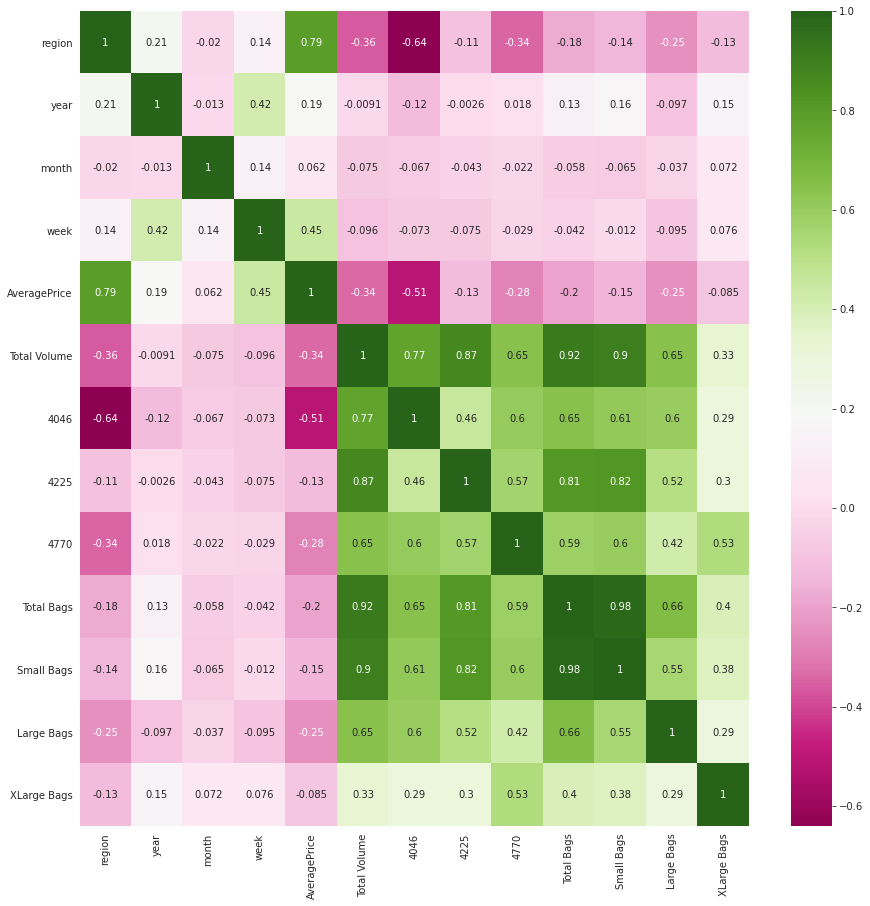

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_stan.corr(),annot=True,cmap='PiYG')

**multicollinearity exists**

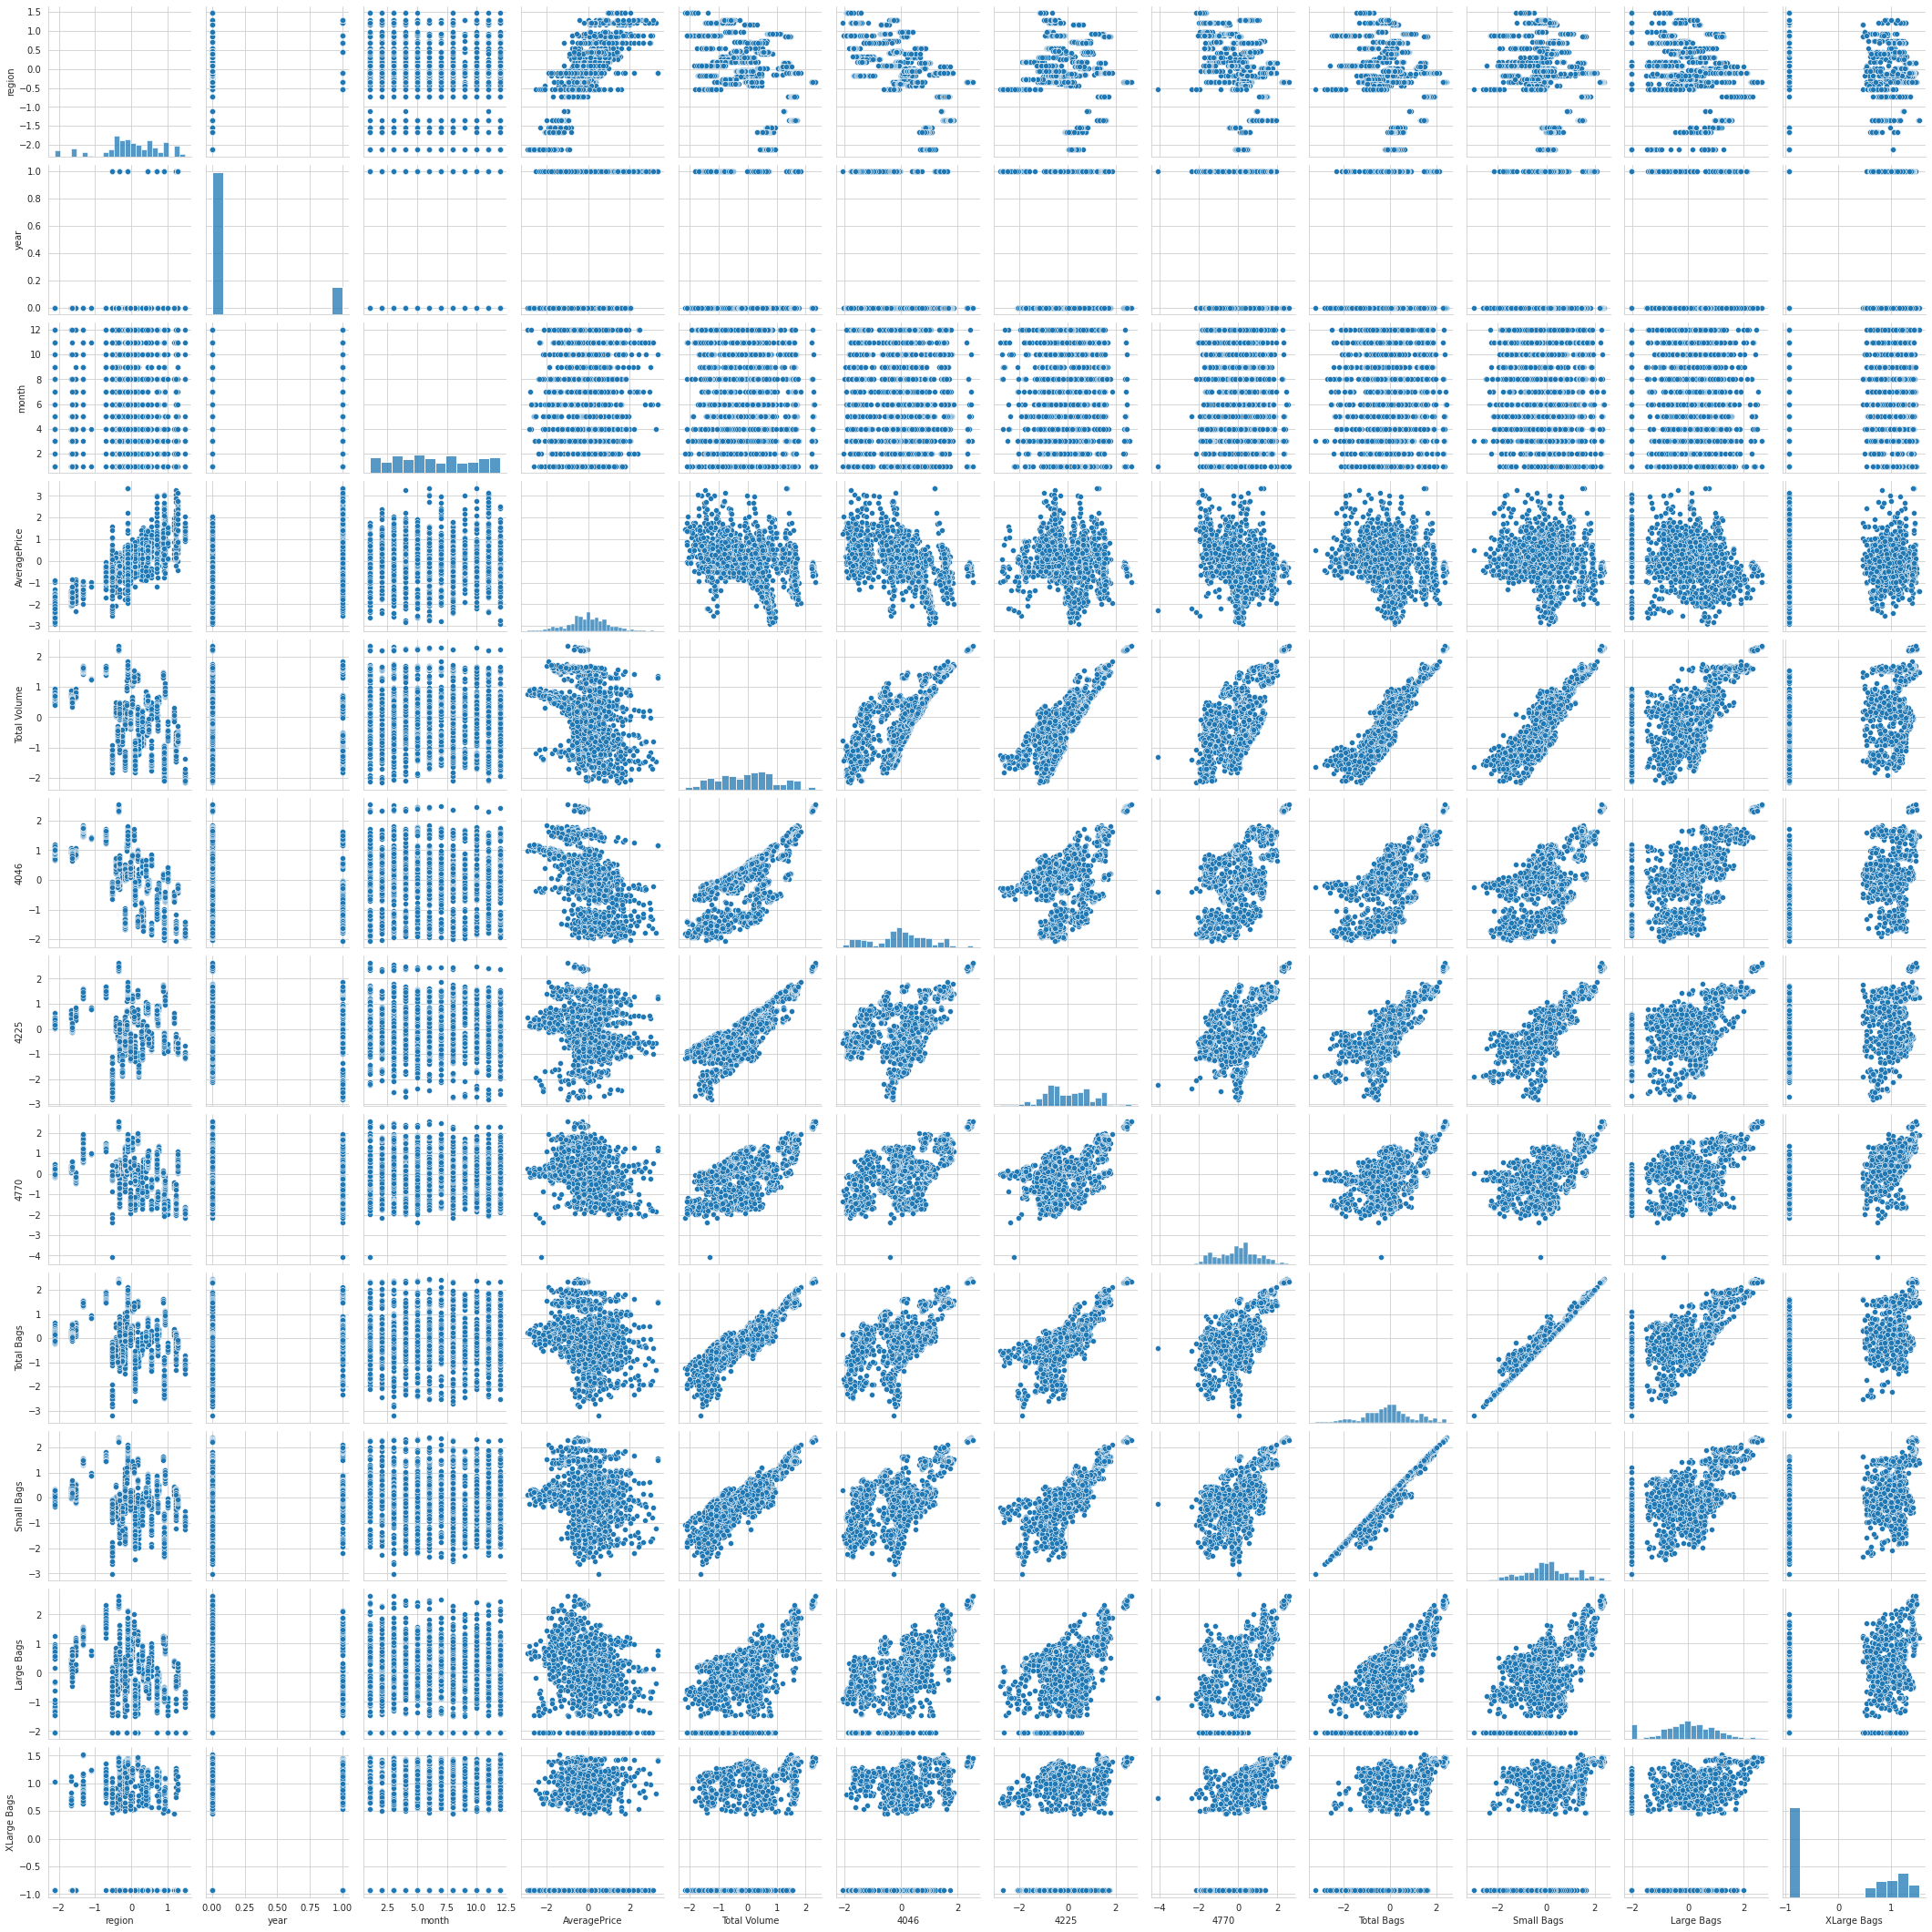

In [ ]:
sns.pairplot(df_stan)

## **Anova test**

In [ ]:
y=df_stan['AveragePrice']
x=df_stan.drop(['AveragePrice'],axis=1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif as anova
s = SelectKBest(anova, k=10)
s.fit(x,y)

SelectKBest(k=10, score_func=<function f_classif at 0x7f3fe79045f0>)

In [ ]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

0              1
month          1.076403   2.826856e-01
4225           1.696841   1.697583e-05
XLarge Bags    1.852457   5.100331e-07
Small Bags     1.937316   6.681327e-08
Total Bags     2.156436   2.534395e-10
Large Bags     2.748229   1.396238e-17
Total Volume   3.149965   7.001395e-23
4770           3.171528   3.590969e-23
year           3.205548   1.249600e-23
4046           5.965244   5.562678e-62
week          10.482721  2.245656e-120
region        32.169306  7.535254e-312

As discussed earlier month is not related to output 

## **Separating dependent and independent variables**

In [ ]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [ ]:
import scipy.stats as stat
import pylab 
def z_outlier(a,b):
  df_z=pd.concat([a,b],axis=1)
  z=np.abs(stat.zscore(df_z[temp.columns]))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('AveragePrice',axis=1)
  y_z=df_z.AveragePrice
  return(x_z,y_z)

In [ ]:
x_train,y_train=z_outlier(x_train,y_train)


Percent of data retained = 0.991941391941392


In [ ]:
x_train_scaler= ss.transform(x_train)

# **Model Evaluation**

## **Linear Regression**(0.38)

In [ ]:
from sklearn.linear_model import LinearRegression as lr
reg_lr = lr().fit(x_train_scaler,y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.7925311976840461
0.37253936052069675


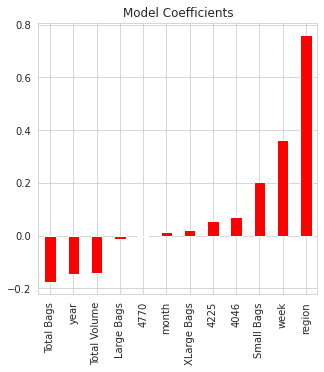

In [ ]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(5,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr(), ss.transform(x), y, cv=10,scoring='neg_mean_absolute_error')

lr_reg=cv_results['test_score'].mean()


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
lr_reg

-0.3935235785928886

## **Ridge-l2**(**0.386**)

In [ ]:
from sklearn.linear_model import Ridge
reg_lr = Ridge().fit(X=x_train_scaler,y=y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.828367264345675
0.34512735383387383


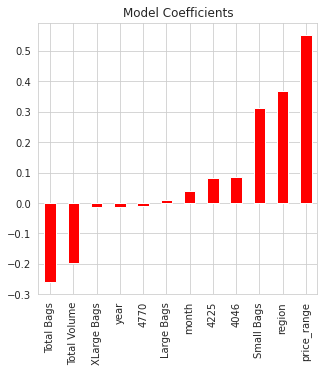

In [ ]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(5,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(Ridge(), ss.transform(x), y, cv=3,scoring='neg_mean_absolute_error')

rid_reg=cv_results['test_score'].mean()

In [ ]:
rid_reg

-0.386173559394188

## **Random Forest Regressor**(0.377)

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR 
reg_rfc = RFR().fit(x_train, y=y_train)
y_pred=reg_rfc.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.889073864410363
0.27066131690690076


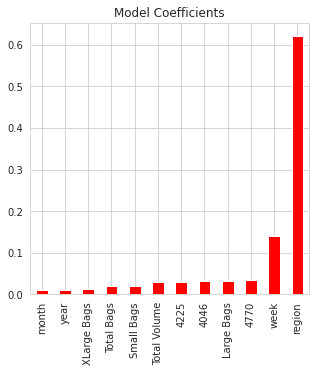

In [ ]:
coef = pd.Series(reg_rfc.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(5,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFR(), x, y, cv=10,scoring='neg_mean_absolute_error')

rfc_score=cv_results['test_score'].mean()


In [ ]:
rfc_score

-0.465454917762102

## **XGB Regressor**(0.382)

In [ ]:
from xgboost import XGBRegressor as XBR
xgr=XBR().fit(x_train,y_train)

y_pred = xgr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))


[10:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8490568624060715
0.3212567416196334


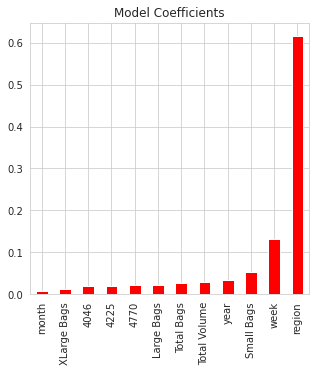

In [ ]:
coef = pd.Series(xgr.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(5,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(), x, y, cv=10,scoring='neg_mean_absolute_error')

xgr_score=cv_results['test_score'].mean()




[10:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
xgr_score

-0.4490076481304728

## **Extra Tree Regressor**(0.48)

In [ ]:
from sklearn.tree import ExtraTreeRegressor as ETR 

etr = ETR()
etr.fit(x_train, y_train)
y_pred=etr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.7077581636248673
0.3777239865262523


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETR(), x, y, cv=10,scoring='neg_mean_absolute_error')

etc_score=cv_results['test_score'].mean()


In [ ]:
etc_score

-0.6150678294270105

## **Support vector Regressor**(0.362)

In [ ]:
from sklearn.svm import SVR

svc = SVR(kernel='linear')
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.7900372670584804
0.37580017590029857


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(kernel='linear'), ss.transform(x), y, cv=10,scoring='neg_mean_absolute_error')

svc_score=cv_results['test_score'].mean()


In [ ]:
svc_score

-0.3916644747715595

## **Comparing models**

In [ ]:
score=[lr_reg,rid_reg,rfc_score,etc_score,xgr_score,svc_score]
name=['LR','Ridge','RFC','ETC','XGR','SVC']
pd.DataFrame([name,score]).T

0         1
0     LR -0.393524
1  Ridge -0.386174
2    RFC -0.465455
3    ETC -0.615068
4    XGR -0.449008
5    SVC -0.391664

# **Hyper-parameter tuning** 

## **Ridge**

In [387]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'alpha': [0.01,0.05,0.1,0.25,0.5,0.5,1], 
 }
]

gsearch_ri = GridSearchCV(Ridge(), param_grid, cv=3, scoring='neg_mean_absolute_error')
gsearch_ri.fit(x_train_scaler, y_train)
print('Best score:', gsearch_ri.best_score_)
print('Best score:', gsearch_ri.best_params_)
print('Best score:', gsearch_ri.best_estimator_)

Best score: -0.3756891644021616
Best score: {'alpha': 0.01}
Best score: Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [390]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(Ridge(alpha=0.01), ss.transform(x), y, cv=10,scoring='neg_mean_absolute_error')

hp_rr=cv_results['test_score'].mean()

In [391]:
hp_rr

-0.3868441714969707

In [393]:
rr=Ridge(alpha=0.01).fit(x_test_scaler,y_test)

## **Linear reg**




In [ ]:
from sklearn.model_selection import GridSearchCV

param_tuning = {
        'fit_intercept': [True,False],
        'normalize': [True,False],
        'copy_X': [True,False],
        
        }
lr_model = lr()

gsearch = GridSearchCV(estimator = lr_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1,scoring='neg_mean_absolute_error')
gsearch.fit(x_train_scaler,y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
print('Best score:', gsearch.best_score_)
print('Best score:', gsearch.best_params_)
print('Best score:', gsearch.best_estimator_)

Best score: -0.37341775046175807
Best score: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best score: LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True), ss.transform(x), y, cv=10,scoring='neg_mean_absolute_error')

hp_lr=cv_results['test_score'].mean()

In [ ]:
hp_lr

-0.3927844568365958

In [ ]:
lrr=lr(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True).fit(x_train,y_train)

## **Support vector Reg**




In [ ]:
from sklearn.model_selection import GridSearchCV

params={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
 'C':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.05,0.1,0.5,1,2,5]}

svc_grid = GridSearchCV(SVR(), params, cv=3,scoring='neg_mean_absolute_error')
svc_grid.fit(ss.transform(x), y)

print('Best score:', svc_grid.best_score_)
print('Best score:', svc_grid.best_params_)
print('Best score:', svc_grid.best_estimator_)

Best score: -0.40948626570075447
Best score: {'C': 0.01, 'kernel': 'linear'}
Best score: SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [388]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), ss.transform(x), y, cv=10,scoring='neg_mean_absolute_error')

hp_SVC=cv_results['test_score']

In [389]:
hp_SVC

array([-0.46533426, -0.3119705 , -0.32611564, -0.41111607, -0.40008039,
       -0.38436046, -0.28043863, -0.33717779, -0.42629404, -0.51036324])

In [ ]:

svr = SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr.fit(x_train_scaler,y_train)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# **Best Model Evaluation**

In [413]:
x,y=z_outlier(x,y)

Percent of data retained = 1.0


In [414]:
y_pred = rr.predict(ss.transform(x))
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))


0.7468318785702119
0.3803767607178985


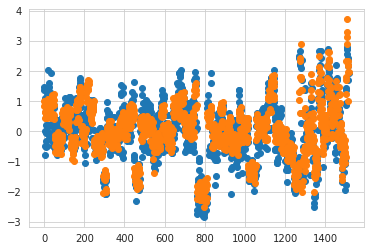

In [415]:
plt.scatter(x=y.index,y=y,cmap='blue')
plt.scatter(x=y.index,y=y_pred,cmap='red')

(array([  3.,  18.,  93., 291., 481., 373., 176.,  57.,   9.,   2.]),
 array([-1.76232721, -1.3845458 , -1.0067644 , -0.62898299, -0.25120158,
         0.12657982,  0.50436123,  0.88214263,  1.25992404,  1.63770545,
         2.01548685]),
 <a list of 10 Patch objects>)

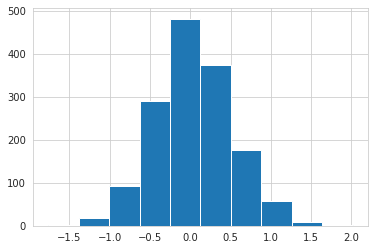

In [416]:
plt.hist((y_pred-y))

# **Saving the model** 

In [417]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [418]:
import pickle

filename = '/content/drive/MyDrive/datatrained/avocado/model.sav'
pickle.dump(rr, open(filename, 'wb'))

# **Conclusion**

In [419]:

filename = '/content/drive/MyDrive/datatrained/avocado/model.sav'
model = pickle.load(open(filename, 'rb'))

In [420]:
y_pred = model.predict(ss.transform(x))
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))

0.7468318785702119
0.3803767607178985
